In [1]:
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\jakub\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\jakub\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
def analyze_ortho_games(csv_path):
    """
    Funkcja wczytuje dane z pliku games.csv oraz wykonuje analizę wpływu średniego wieku 
    uczestników oraz różnych kombinacji relacji między nimi na wynik uzyskany w grze.
    
    Założenia:
      - Kolumny dotyczące wieku: 'Age_X_axis' oraz 'Age_Y_axis'. Łączymy je, licząc średnią,
        zapisując wynik w kolumnie 'AGE_AVG'.
      - Kolumny dotyczące relacji: 'Companionship_X_axis' oraz 'Companionship_Y_axis'. 
        Zamiast liczenia średniej, tworzymy kombinację relacji jako uporządkowaną parę, np. "0 i 0", "0 i 1", "0 i 2", "0 i 3", "1 i 1", "1 i 2", "1 i 3", "2 i 2", "2 i 3", "3 i 3".
      - Wskaźnikiem wyniku jest kolumna 'Track_Time'.
      - Każdy tor identyfikuje kolumna 'Track_ID', dlatego analiza jest wykonywana osobno dla każdego toru.
      - Przed analizą usuwamy tory, dla których Track_ID jest większe niż 7.
    """
    # Wczytanie danych
    df = pd.read_csv(csv_path)

    # Filtracja – usunięcie wierszy, dla których Track_ID > 7
    df = df[df['Track_ID'] <= 7]
    df = df[df['Age_X_axis'] < 100]
    df = df[df['Age_X_axis'] > 3]  # Usunięcie wierszy z zerowym czasem
    df = df[df['Age_Y_axis'] < 100]  # Usunięcie wierszy z zerowym czasem
    df = df[df['Age_Y_axis'] > 3]  # Usunięcie wierszy z zerowym czasem 

    # Sprawdzenie, czy kolumny z wiekiem istnieją
    required_age_cols = ['Age_X_axis', 'Age_Y_axis']
    for col in required_age_cols:
        if col not in df.columns:
            print(f"Brak wymaganej kolumny: {col}")
            return

    # Obliczenie średniego wieku uczestników
    df['AGE_AVG'] = df[required_age_cols].mean(axis=1)

    # Sprawdzenie, czy kolumny dotyczące relacji istnieją
    required_comp_cols = ['Companionship_X_axis', 'Companionship_Y_axis']
    for col in required_comp_cols:
        if col not in df.columns:
            print(f"Brak wymaganej kolumny: {col}")
            return

    # Utworzenie kolumny z kombinacją relacji – porównujemy wartości i tworzymy uporządkowaną parę,
    # gdzie kolejność nie ma znaczenia
    df['COMPANIONSHIP_PAIR'] = df.apply(
        lambda row: f"{min(row['Companionship_X_axis'], row['Companionship_Y_axis'])} i {max(row['Companionship_X_axis'], row['Companionship_Y_axis'])}",
        axis=1
    )

    # Sprawdzenie istnienia kolumn 'Track_ID' oraz 'Track_Time' (wynik)
    if 'Track_ID' not in df.columns:
        print("Brak kolumny 'Track_ID'.")
        return
    if 'Track_Time' not in df.columns:
        print("Brak kolumny 'Track_Time' stanowiącej wynik.")
        return

    # Pobranie unikalnych torów
    tracks = df['Track_ID'].unique()

    for track in tracks:
        track_data = df[df['Track_ID'] == track].copy()
        print(f"\n=== Analiza dla toru: {track} ===")
        
        # Obliczenie korelacji między średnim wiekiem a wynikiem (Track_Time)
        if track_data['AGE_AVG'].notnull().sum() > 1 and track_data['Track_Time'].notnull().sum() > 1:
            age_corr = track_data[['AGE_AVG', 'Track_Time']].corr().iloc[0, 1]
            print(f"Korelacja między średnim wiekiem a czasem toru: {age_corr:.2f}")
        else:
            print("Za mało danych do obliczenia korelacji między wiekiem a wynikiem.")

        # Wykres rozrzutu: zależność Track_Time od AGE_AVG
        plt.figure()
        plt.scatter(track_data['AGE_AVG'], track_data['Track_Time'])
        plt.title(f"Tor {track}: Wpływ średniego wieku na wynik (Track_Time)")
        plt.xlabel("Średni wiek uczestników (AGE_AVG)")
        plt.ylabel("Czas toru (Track_Time)")
        plt.grid(True)
        plt.show()

        # Analiza wpływu kombinacji relacji na wynik:
        # Grupujemy dane według nowej kolumny 'COMPANIONSHIP_PAIR'
        rel_group = track_data.groupby('COMPANIONSHIP_PAIR')['Track_Time'].mean().reset_index()
        
        plt.figure()
        plt.bar(rel_group['COMPANIONSHIP_PAIR'], rel_group['Track_Time'])
        plt.title(f"Tor {track}: Średni czas toru wg. kombinacji relacji")
        plt.xlabel("Kombinacja relacji (Companionship Pair)")
        plt.ylabel("Średni czas toru (Track_Time)")
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()



=== Analiza dla toru: 2 ===
Korelacja między średnim wiekiem a czasem toru: -0.05


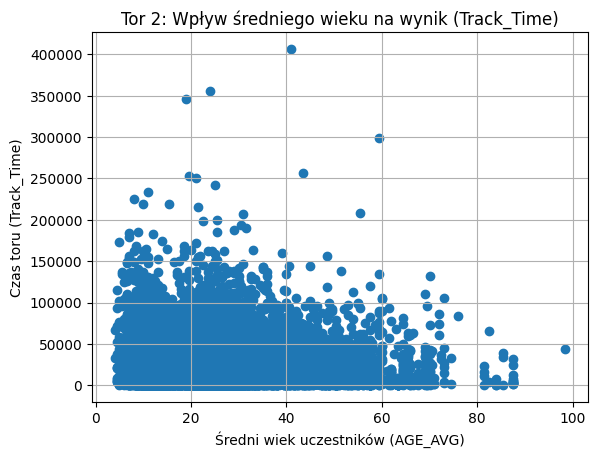

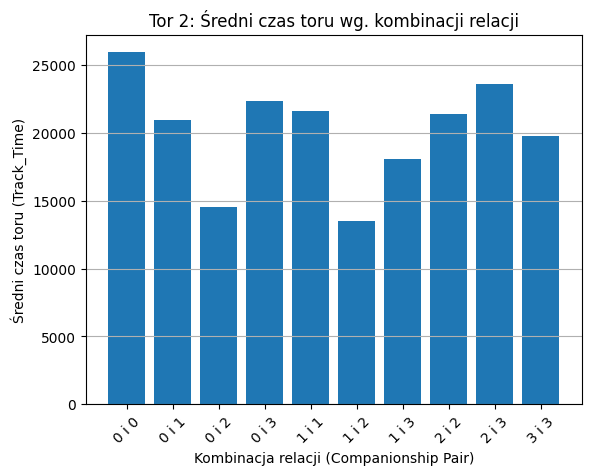


=== Analiza dla toru: 4 ===
Korelacja między średnim wiekiem a czasem toru: -0.01


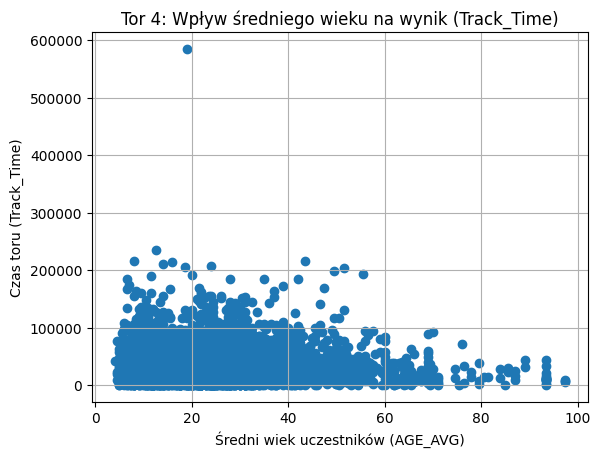

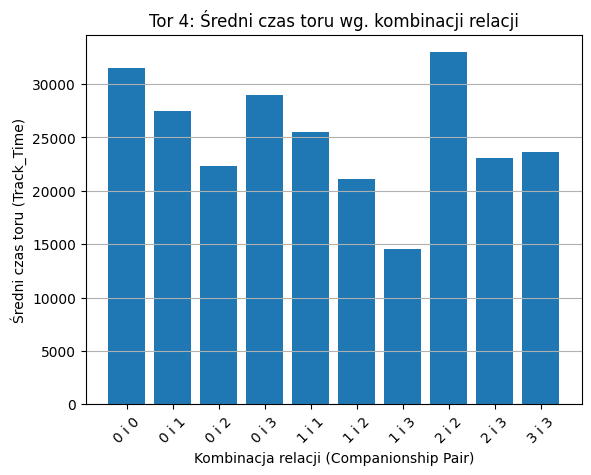


=== Analiza dla toru: 6 ===
Korelacja między średnim wiekiem a czasem toru: 0.01


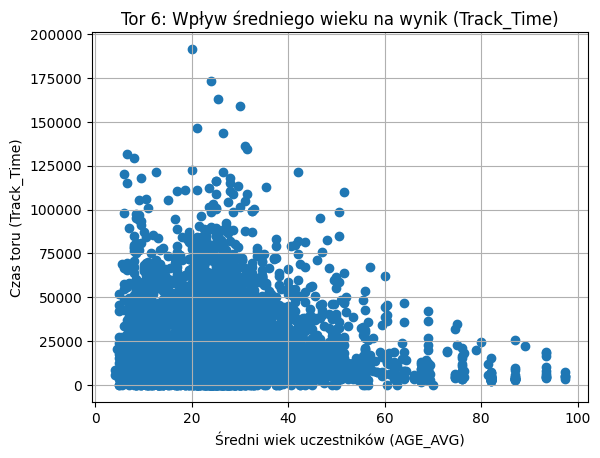

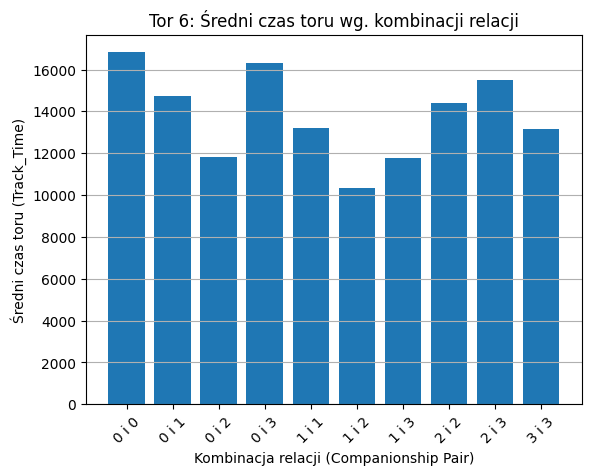


=== Analiza dla toru: 3 ===
Korelacja między średnim wiekiem a czasem toru: -0.08


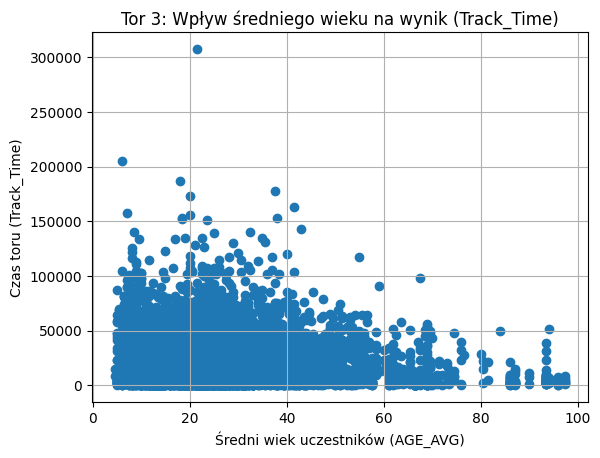

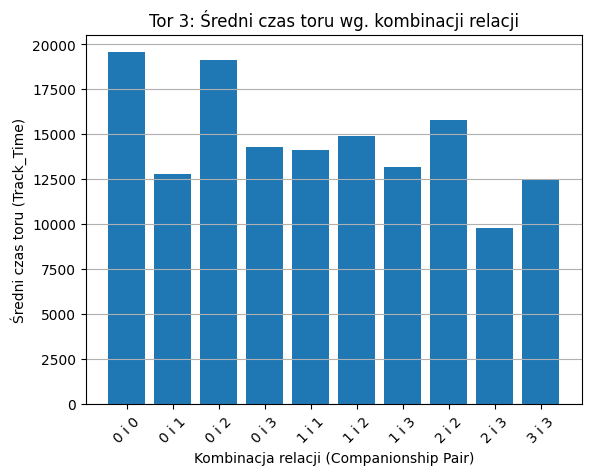


=== Analiza dla toru: 1 ===
Korelacja między średnim wiekiem a czasem toru: -0.05


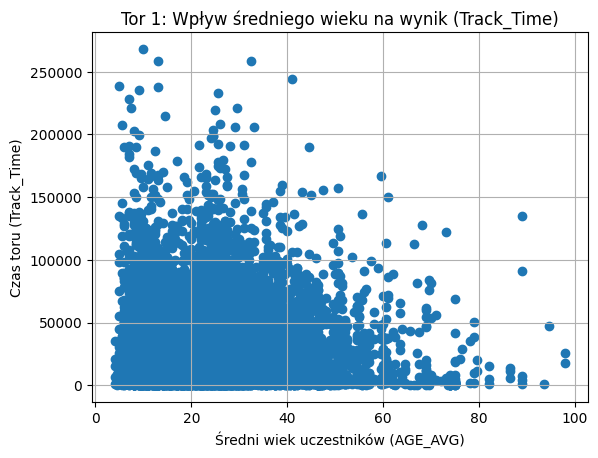

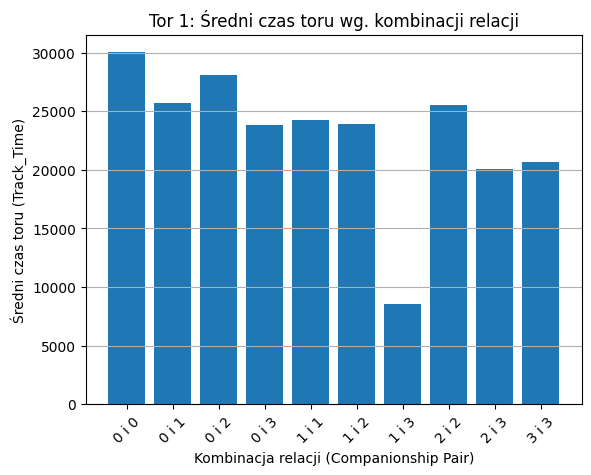


=== Analiza dla toru: 7 ===
Korelacja między średnim wiekiem a czasem toru: -0.02


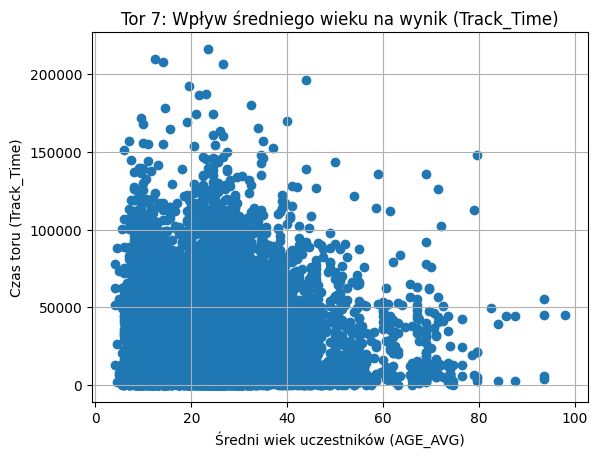

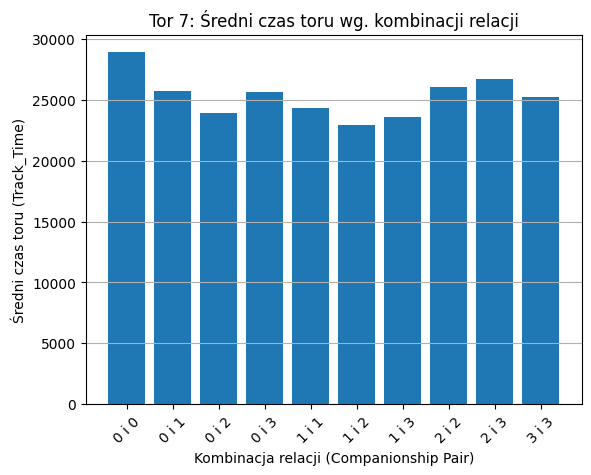


=== Analiza dla toru: 5 ===
Korelacja między średnim wiekiem a czasem toru: -0.03


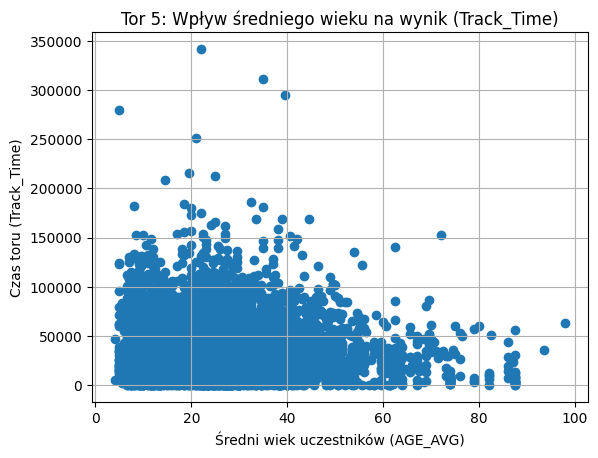

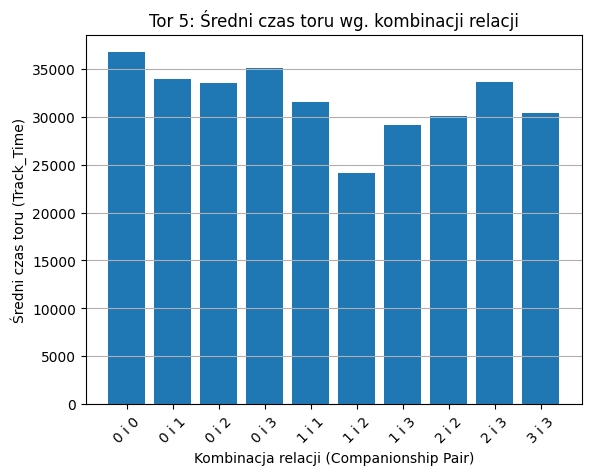

In [16]:
analyze_ortho_games(r'C:\Semestr_6\WarsztatyBadawcze\repo\ORTHO\output\games\games.csv')

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Ustawienie stylu dla wykresów
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

def load_games_data(file_path):
    """Ładuje dane z pliku games.csv"""
    print(f"Wczytywanie pliku {file_path}...")
    games_df = pd.read_csv(file_path)
    print(f"Wczytano surowe dane: {len(games_df)} wierszy")
    
    # Sprawdzenie, czy kolumny istnieją
    required_columns = ['Age_X_axis', 'Age_Y_axis', 'Companionship_X_axis', 
                        'Companionship_Y_axis', 'Track_Time', 'Track_ID', 
                        'Track_Completed', 'Mistake']
    
    for col in required_columns:
        if col not in games_df.columns:
            print(f"UWAGA: Brak kolumny {col} w danych!")
    
    # Filtracja – usunięcie wierszy, dla których Track_ID > 7
    print("Filtrowanie danych...")
    
    # Wydrukuj wszystkie unikalne Track_ID przed filtrowaniem
    print(f"Unikalne Track_ID przed filtrowaniem: {sorted(games_df['Track_ID'].unique())}")
    
    # Filtrujemy tylko gdy kolumna istnieje
    if 'Track_ID' in games_df:
        games_df = games_df[games_df['Track_ID'] <= 7]
    
    if 'Age_X_axis' in games_df:
        games_df = games_df[games_df['Age_X_axis'] < 100]
        games_df = games_df[games_df['Age_X_axis'] > 3]
    
    if 'Age_Y_axis' in games_df:
        games_df = games_df[games_df['Age_Y_axis'] < 100]
        games_df = games_df[games_df['Age_Y_axis'] > 3]
    
    # Wydrukuj liczbę wierszy po wstępnym filtrowaniu
    print(f"Liczba wierszy po wstępnym filtrowaniu: {len(games_df)}")
    
    # Czyszczenie danych - usuwanie wierszy z brakującymi kluczowymi wartościami
    games_df = games_df.dropna(subset=['Age_X_axis', 'Age_Y_axis', 'Companionship_X_axis', 
                                       'Companionship_Y_axis', 'Track_Time', 'Track_ID'])
    
    print(f"Liczba wierszy po usunięciu brakujących wartości: {len(games_df)}")
    
    # Sprawdzenie typów danych przed konwersją
    print("Typy danych przed konwersją:")
    print(games_df[['Age_X_axis', 'Age_Y_axis', 'Track_Time', 'Track_ID']].dtypes)
    
    # Konwersja typów danych
    for col in ['Age_X_axis', 'Age_Y_axis', 'Track_Time', 'Track_ID']:
        games_df[col] = pd.to_numeric(games_df[col], errors='coerce')
    
    # Sprawdzenie, czy są NaN po konwersji
    nan_counts = games_df[['Age_X_axis', 'Age_Y_axis', 'Track_Time', 'Track_ID']].isna().sum()
    print("Liczba wartości NaN po konwersji:")
    print(nan_counts)
    
    # Usunięcie wierszy z NaN po konwersji
    games_df = games_df.dropna(subset=['Age_X_axis', 'Age_Y_axis', 'Track_Time', 'Track_ID'])
    print(f"Liczba wierszy po usunięciu wartości NaN po konwersji: {len(games_df)}")
    
    # Konwersja wartości logicznych
    for col in ['Track_Completed', 'Mistake']:
        if col in games_df.columns:
            # Sprawdź unikalne wartości w kolumnie
            unique_values = games_df[col].unique()
            print(f"Unikalne wartości w kolumnie {col}: {unique_values}")
            
            # Konwertuj na wartości logiczne
            games_df[col] = games_df[col].map({'True': True, 'False': False, True: True, False: False})
            
            # Sprawdź, czy są jakieś wartości None/NaN po konwersji
            null_count = games_df[col].isna().sum()
            print(f"Liczba wartości None/NaN w {col} po konwersji: {null_count}")
            
            # Jeśli są wartości None/NaN, zastąp je wartością False
            if null_count > 0:
                games_df[col] = games_df[col].fillna(False)
    
    # Obliczenie średniego wieku i zdefiniowanie grup wiekowych
    games_df['Average_Age'] = (games_df['Age_X_axis'] + games_df['Age_Y_axis']) / 2
    
    # Definiowanie grup wiekowych
    def get_age_group(age):
        if age < 18:
            return "< 18"
        elif age < 30:
            return "18-29"
        elif age < 45:
            return "30-44"
        elif age < 60:
            return "45-59"
        else:
            return "60+"
    
    games_df['Age_Group'] = games_df['Average_Age'].apply(get_age_group)
    
    # Sprawdź unikalne grupy wiekowe
    unique_age_groups = games_df['Age_Group'].unique()
    print(f"Unikalne grupy wiekowe: {unique_age_groups}")
    
    # Definiowanie relacji (używając maksymalnej wartości relacji między uczestnikami)
    if 'Companionship_X_axis' in games_df and 'Companionship_Y_axis' in games_df:
        games_df['Relationship'] = games_df[['Companionship_X_axis', 'Companionship_Y_axis']].max(axis=1)
        
        # Konwersja relacji na nazwy tekstowe
        relationship_mapping = {0: "Obcy", 1: "Znajomi", 2: "Bliscy (rodzina/przyjaciele)", 3: "Bardzo bliscy"}
        games_df['Relationship_Name'] = games_df['Relationship'].map(relationship_mapping)
        
        # Sprawdź unikalne relacje
        unique_relationships = games_df['Relationship_Name'].unique()
        print(f"Unikalne relacje: {unique_relationships}")
    
    return games_df

def analyze_track(games_df, track_id):
    """Analiza danych dla konkretnego toru"""
    # Filtrowanie danych dla wybranego toru
    track_games = games_df[games_df['Track_ID'] == track_id].copy()
    
    if track_games.empty:
        print(f"Brak danych dla toru {track_id}")
        return None
    
    print(f"\nAnaliza dla toru {track_id}:")
    print(f"Liczba gier: {len(track_games)}")
    
    # Sprawdź wartości w Track_Completed
    print(f"Unikalne wartości w Track_Completed: {track_games['Track_Completed'].unique()}")
    
    # 1. Analiza wpływu wieku na wyniki
    # Najpierw filtrujemy gry ukończone dla obliczenia średniego czasu
    completed_games = track_games[track_games['Track_Completed'] == True].copy()
    print(f"Liczba ukończonych gier: {len(completed_games)}")
    
    # Sprawdź, czy są jakieś ukończone gry
    if len(completed_games) == 0:
        print(f"UWAGA: Brak ukończonych gier dla toru {track_id}!")
        
        # Jeśli nie ma ukończonych gier, możemy użyć wszystkich gier do analizy czasu
        # lub ustawić czas na None/NaN, w zależności od potrzeb
        completed_games = track_games.copy()
    
    # Grupowanie według wieku
    age_groups = track_games.groupby('Age_Group')
    
    # Sprawdź, czy są jakiekolwiek grupy wiekowe
    if len(age_groups) == 0:
        print(f"UWAGA: Brak grup wiekowych dla toru {track_id}!")
        return None
    
    # Przygotuj ramkę danych do analizy wieku
    age_analysis_data = []
    
    for age_group, group in age_groups:
        group_completed = group[group['Track_Completed'] == True]
        
        avg_time = np.nan
        if len(group_completed) > 0:
            avg_time = group_completed['Track_Time'].mean()
        
        age_analysis_data.append({
            'Age_Group': age_group,
            'Track_Completed': group['Track_Completed'].mean(),
            'Mistake': group['Mistake'].mean(),
            'Track_Time': avg_time,
            'count': len(group)
        })
    
    age_analysis = pd.DataFrame(age_analysis_data)
    
    # Sortowanie grup wiekowych w logicznej kolejności
    age_order = ["< 18", "18-29", "30-44", "45-59", "60+"]
    age_analysis['Age_Group'] = pd.Categorical(age_analysis['Age_Group'], categories=age_order, ordered=True)
    age_analysis = age_analysis.sort_values('Age_Group')
    
    # 2. Analiza wpływu relacji na wyniki
    rel_groups = track_games.groupby('Relationship_Name')
    
    # Sprawdź, czy są jakiekolwiek grupy relacji
    if len(rel_groups) == 0:
        print(f"UWAGA: Brak grup relacji dla toru {track_id}!")
        return None
    
    # Przygotuj ramkę danych do analizy relacji
    rel_analysis_data = []
    
    for rel_name, group in rel_groups:
        group_completed = group[group['Track_Completed'] == True]
        
        avg_time = np.nan
        if len(group_completed) > 0:
            avg_time = group_completed['Track_Time'].mean()
        
        rel_analysis_data.append({
            'Relationship_Name': rel_name,
            'Track_Completed': group['Track_Completed'].mean(),
            'Mistake': group['Mistake'].mean(),
            'Track_Time': avg_time,
            'count': len(group)
        })
    
    rel_analysis = pd.DataFrame(rel_analysis_data)
    
    # Sortowanie relacji w logicznej kolejności
    rel_order = ["Obcy", "Znajomi", "Bliscy (rodzina/przyjaciele)", "Bardzo bliscy"]
    rel_analysis['Relationship_Name'] = pd.Categorical(rel_analysis['Relationship_Name'], categories=rel_order, ordered=True)
    rel_analysis = rel_analysis.sort_values('Relationship_Name')
    
    # Pokaż pierwsze wiersze wyników analizy dla weryfikacji
    print("\nAnaliza wieku - pierwsze wiersze:")
    print(age_analysis.head())
    
    print("\nAnaliza relacji - pierwsze wiersze:")
    print(rel_analysis.head())
    
    # 3. Korelacja między wiekiem a czasem ukończenia
    if len(completed_games) > 1:  # Potrzebujemy co najmniej 2 punktów do obliczenia korelacji
        corr, p_value = pearsonr(completed_games['Average_Age'], completed_games['Track_Time'])
        print(f"Korelacja między wiekiem a czasem ukończenia: {corr:.4f} (p={p_value:.4f})")
    else:
        print("Za mało danych, aby obliczyć korelację wieku z czasem ukończenia.")
    
    return {
        'track_id': track_id,
        'games_count': len(track_games),
        'age_analysis': age_analysis,
        'rel_analysis': rel_analysis,
        'completed_count': len(track_games[track_games['Track_Completed'] == True]),
    }

def visualize_track_analysis(analysis_result):
    """Wizualizacja wyników analizy dla toru"""
    if analysis_result is None:
        return
    
    track_id = analysis_result['track_id']
    age_analysis = analysis_result['age_analysis']
    rel_analysis = analysis_result['rel_analysis']
    
    # Sprawdź, czy dane do wizualizacji nie są puste
    if age_analysis.empty or rel_analysis.empty:
        print(f"UWAGA: Brak danych do wizualizacji dla toru {track_id}")
        return
    
    # Utworzenie katalogu wynikowego
    output_dir = 'wyniki_analizy'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Najpierw zapisz dane do pliku CSV dla debugowania
    age_analysis.to_csv(os.path.join(output_dir, f'age_analysis_tor_{track_id}.csv'), index=False)
    rel_analysis.to_csv(os.path.join(output_dir, f'rel_analysis_tor_{track_id}.csv'), index=False)
    
    # Sprawdź, czy są wartości NaN w danych
    print(f"\nWartości NaN w danych do wizualizacji (tor {track_id}):")
    print("Age analysis:")
    print(age_analysis.isna().sum())
    print("Relationship analysis:")
    print(rel_analysis.isna().sum())
    
    # Zastąp NaN zerem lub inną wartością zależnie od potrzeb
    age_analysis['Track_Time'] = age_analysis['Track_Time'].fillna(0)
    rel_analysis['Track_Time'] = rel_analysis['Track_Time'].fillna(0)
    
    # Utworzenie figury do wizualizacji
    fig = plt.figure(figsize=(18, 12))
    fig.suptitle(f'Analiza dla toru {track_id}', fontsize=16)
    
    # 1. Wizualizacja wpływu wieku
    # 1.1 Średni czas ukończenia
    ax1 = plt.subplot(2, 3, 1)
    sns.barplot(x='Age_Group', y='Track_Time', data=age_analysis, ax=ax1, errorbar=None)
    ax1.set_title('Średni czas ukończenia według grup wiekowych')
    ax1.set_ylabel('Czas (ms)')
    ax1.tick_params(axis='x', rotation=45)
    
    # 1.2 Wskaźnik ukończenia
    ax2 = plt.subplot(2, 3, 2)
    sns.barplot(x='Age_Group', y='Track_Completed', data=age_analysis, ax=ax2, errorbar=None)
    ax2.set_title('Wskaźnik ukończenia według grup wiekowych')
    ax2.set_ylabel('Wskaźnik ukończenia')
    ax2.set_ylim(0, 1)
    ax2.tick_params(axis='x', rotation=45)
    
    # 1.3 Wskaźnik błędów
    ax3 = plt.subplot(2, 3, 3)
    sns.barplot(x='Age_Group', y='Mistake', data=age_analysis, ax=ax3, errorbar=None)
    ax3.set_title('Wskaźnik błędów według grup wiekowych')
    ax3.set_ylabel('Wskaźnik błędów')
    ax3.set_ylim(0, 1)
    ax3.tick_params(axis='x', rotation=45)
    
    # 2. Wizualizacja wpływu relacji
    # 2.1 Średni czas ukończenia
    ax4 = plt.subplot(2, 3, 4)
    sns.barplot(x='Relationship_Name', y='Track_Time', data=rel_analysis, ax=ax4, errorbar=None)
    ax4.set_title('Średni czas ukończenia według relacji')
    ax4.set_ylabel('Czas (ms)')
    ax4.tick_params(axis='x', rotation=45)
    
    # 2.2 Wskaźnik ukończenia
    ax5 = plt.subplot(2, 3, 5)
    sns.barplot(x='Relationship_Name', y='Track_Completed', data=rel_analysis, ax=ax5, errorbar=None)
    ax5.set_title('Wskaźnik ukończenia według relacji')
    ax5.set_ylabel('Wskaźnik ukończenia')
    ax5.set_ylim(0, 1)
    ax5.tick_params(axis='x', rotation=45)
    
    # 2.3 Wskaźnik błędów
    ax6 = plt.subplot(2, 3, 6)
    sns.barplot(x='Relationship_Name', y='Mistake', data=rel_analysis, ax=ax6, errorbar=None)
    ax6.set_title('Wskaźnik błędów według relacji')
    ax6.set_ylabel('Wskaźnik błędów')
    ax6.set_ylim(0, 1)
    ax6.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    
    # Wyświetl wykres w notebooku
    plt.show()
    
    # Zapisanie wykresu
    plt.savefig(os.path.join(output_dir, f'analiza_toru_{track_id}.png'), dpi=300)
    plt.close()
    
    # Wykres liczby rozgrywek w grupach
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Według wieku
    sns.barplot(x='Age_Group', y='count', data=age_analysis, ax=ax1, errorbar=None)
    ax1.set_title('Liczba rozgrywek według grup wiekowych')
    ax1.set_ylabel('Liczba gier')
    ax1.tick_params(axis='x', rotation=45)
    
    # Według relacji
    sns.barplot(x='Relationship_Name', y='count', data=rel_analysis, ax=ax2, errorbar=None)
    ax2.set_title('Liczba rozgrywek według relacji')
    ax2.set_ylabel('Liczba gier')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    
    # Wyświetl wykres w notebooku
    plt.show()
    
    plt.savefig(os.path.join(output_dir, f'liczba_gier_tor_{track_id}.png'), dpi=300)
    plt.close()

def compare_all_tracks(games_df, tracks_to_analyze=None):
    """Porównanie wyników między torami"""
    if tracks_to_analyze is None:
        tracks_to_analyze = games_df['Track_ID'].unique()
    
    print(f"Porównywanie torów: {tracks_to_analyze}")
    
    # Przygotowanie danych do porównania
    age_data = []
    rel_data = []
    
    for track_id in tracks_to_analyze:
        print(f"Przetwarzanie danych dla toru {track_id}...")
        track_games = games_df[games_df['Track_ID'] == track_id].copy()
        if track_games.empty:
            print(f"Brak danych dla toru {track_id}")
            continue
        
        # Filtrujemy ukończone gry dla obliczenia średniego czasu
        completed_games = track_games[track_games['Track_Completed'] == True].copy()
        print(f"Liczba ukończonych gier dla toru {track_id}: {len(completed_games)}")
        
        # Grupowanie według wieku
        age_groups = track_games.groupby('Age_Group')
        
        for age_group, group in age_groups:
            group_completed = group[group['Track_Completed'] == True]
            
            avg_time = np.nan
            if len(group_completed) > 0:
                avg_time = group_completed['Track_Time'].mean()
            
            age_data.append({
                'Age_Group': age_group,
                'Track_Completed': group['Track_Completed'].mean(),
                'Mistake': group['Mistake'].mean(),
                'Track_Time': avg_time,
                'Track_ID': track_id
            })
        
        # Grupowanie według relacji
        rel_groups = track_games.groupby('Relationship_Name')
        
        for rel_name, group in rel_groups:
            group_completed = group[group['Track_Completed'] == True]
            
            avg_time = np.nan
            if len(group_completed) > 0:
                avg_time = group_completed['Track_Time'].mean()
            
            rel_data.append({
                'Relationship_Name': rel_name,
                'Track_Completed': group['Track_Completed'].mean(),
                'Mistake': group['Mistake'].mean(),
                'Track_Time': avg_time,
                'Track_ID': track_id
            })
    
    # Tworzenie ramek danych z list
    all_age_data = pd.DataFrame(age_data)
    all_rel_data = pd.DataFrame(rel_data)
    
    # Sprawdź, czy mamy jakiekolwiek dane
    if all_age_data.empty or all_rel_data.empty:
        print("UWAGA: Brak danych do porównania torów!")
        return
    
    # Sortowanie grup wiekowych
    age_order = ["< 18", "18-29", "30-44", "45-59", "60+"]
    all_age_data['Age_Group'] = pd.Categorical(all_age_data['Age_Group'], categories=age_order, ordered=True)
    
    # Sortowanie relacji
    rel_order = ["Obcy", "Znajomi", "Bliscy (rodzina/przyjaciele)", "Bardzo bliscy"]
    all_rel_data['Relationship_Name'] = pd.Categorical(all_rel_data['Relationship_Name'], categories=rel_order, ordered=True)
    
    # Sprawdź wartości NaN
    print("\nWartości NaN w danych do porównania:")
    print("Age data:")
    print(all_age_data.isna().sum())
    print("Relationship data:")
    print(all_rel_data.isna().sum())
    
    # Zastąp NaN zerem lub inną wartością zależnie od potrzeb
    all_age_data['Track_Time'] = all_age_data['Track_Time'].fillna(0)
    all_rel_data['Track_Time'] = all_rel_data['Track_Time'].fillna(0)
    
    # Zapisz dane do plików CSV dla debugowania
    output_dir = 'wyniki_analizy'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    all_age_data.to_csv(os.path.join(output_dir, 'all_age_data.csv'), index=False)
    all_rel_data.to_csv(os.path.join(output_dir, 'all_rel_data.csv'), index=False)
    
    # Wizualizacja porównania torów
    # 1. Porównanie wpływu wieku między torami
    plt.figure(figsize=(14, 8))
    
    # 1.1 Czas ukończenia według wieku
    plt.subplot(1, 2, 1)
    try:
        sns.lineplot(x='Age_Group', y='Track_Time', hue='Track_ID', data=all_age_data, marker='o', errorbar=None)
        plt.title('Średni czas ukończenia według grup wiekowych')
        plt.ylabel('Czas (ms)')
        plt.xticks(rotation=45)
        plt.legend(title='Tor')
    except Exception as e:
        print(f"Błąd podczas tworzenia wykresu czasu ukończenia według wieku: {str(e)}")
    
    # 1.2 Wskaźnik ukończenia według wieku
    plt.subplot(1, 2, 2)
    try:
        sns.lineplot(x='Age_Group', y='Track_Completed', hue='Track_ID', data=all_age_data, marker='o', errorbar=None)
        plt.title('Wskaźnik ukończenia według grup wiekowych')
        plt.ylabel('Wskaźnik ukończenia')
        plt.ylim(0, 1)
        plt.xticks(rotation=45)
        plt.legend(title='Tor')
    except Exception as e:
        print(f"Błąd podczas tworzenia wykresu wskaźnika ukończenia według wieku: {str(e)}")
    
    plt.tight_layout()
    # Wyświetl wykres w notebooku
    plt.show()
    
    plt.savefig(os.path.join(output_dir, 'porownanie_wiek.png'), dpi=300)
    plt.close()
    
    # 2. Porównanie wpływu relacji między torami
    plt.figure(figsize=(14, 8))
    
    # 2.1 Czas ukończenia według relacji
    plt.subplot(1, 2, 1)
    try:
        sns.lineplot(x='Relationship_Name', y='Track_Time', hue='Track_ID', data=all_rel_data, marker='o', errorbar=None)
        plt.title('Średni czas ukończenia według relacji')
        plt.ylabel('Czas (ms)')
        plt.xticks(rotation=45)
        plt.legend(title='Tor')
    except Exception as e:
        print(f"Błąd podczas tworzenia wykresu czasu ukończenia według relacji: {str(e)}")
    
    # 2.2 Wskaźnik ukończenia według relacji
    plt.subplot(1, 2, 2)
    try:
        sns.lineplot(x='Relationship_Name', y='Track_Completed', hue='Track_ID', data=all_rel_data, marker='o', errorbar=None)
        plt.title('Wskaźnik ukończenia według relacji')
        plt.ylabel('Wskaźnik ukończenia')
        plt.ylim(0, 1)
        plt.xticks(rotation=45)
        plt.legend(title='Tor')
    except Exception as e:
        print(f"Błąd podczas tworzenia wykresu wskaźnika ukończenia według relacji: {str(e)}")
    
    plt.tight_layout()
    # Wyświetl wykres w notebooku
    plt.show()
    
    plt.savefig(os.path.join(output_dir, 'porownanie_relacje.png'), dpi=300)
    plt.close()
    
    # 3. Wskaźnik błędów w różnych grupach
    plt.figure(figsize=(14, 8))
    
    # 3.1 Wskaźnik błędów według wieku
    plt.subplot(1, 2, 1)
    try:
        sns.lineplot(x='Age_Group', y='Mistake', hue='Track_ID', data=all_age_data, marker='o', errorbar=None)
        plt.title('Wskaźnik błędów według grup wiekowych')
        plt.ylabel('Wskaźnik błędów')
        plt.ylim(0, 1)
        plt.xticks(rotation=45)
        plt.legend(title='Tor')
    except Exception as e:
        print(f"Błąd podczas tworzenia wykresu wskaźnika błędów według wieku: {str(e)}")
    
    # 3.2 Wskaźnik błędów według relacji
    plt.subplot(1, 2, 2)
    try:
        sns.lineplot(x='Relationship_Name', y='Mistake', hue='Track_ID', data=all_rel_data, marker='o', errorbar=None)
        plt.title('Wskaźnik błędów według relacji')
        plt.ylabel('Wskaźnik błędów')
        plt.ylim(0, 1)
        plt.xticks(rotation=45)
        plt.legend(title='Tor')
    except Exception as e:
        print(f"Błąd podczas tworzenia wykresu wskaźnika błędów według relacji: {str(e)}")
    
    plt.tight_layout()
    # Wyświetl wykres w notebooku
    plt.show()
    
    plt.savefig(os.path.join(output_dir, 'porownanie_bledy.png'), dpi=300)
    plt.close()

def generate_summary_report(games_df, results):
    """Generowanie raportu podsumowującego analizę"""
    if not results:
        print("UWAGA: Brak wyników do wygenerowania raportu!")
        return
    
    output_dir = 'wyniki_analizy'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    with open(os.path.join(output_dir, 'raport_podsumowujacy.txt'), 'w', encoding='utf-8') as f:
        f.write("RAPORT PODSUMOWUJĄCY ANALIZĘ WPŁYWU WIEKU I RELACJI NA WYNIKI W GRZE ORTHO\n")
        f.write("=" * 80 + "\n\n")
        
        f.write("OGÓLNE INFORMACJE:\n")
        f.write(f"- Łączna liczba analizowanych gier: {len(games_df)}\n")
        f.write(f"- Liczba przeanalizowanych torów: {len(results)}\n")
        
        # Ogólne wnioski dotyczące wieku
        f.write("\nWPŁYW WIEKU NA WYNIKI:\n")
        f.write("1. Średni czas ukończenia:\n")
        for track_id, result in results.items():
            if 'age_analysis' in result and not result['age_analysis'].empty:
                try:
                    # Najpierw sprawdź, czy kolumna Track_Time ma jakieś wartości inne niż NaN
                    if not result['age_analysis']['Track_Time'].isna().all():
                        best_age = result['age_analysis'].loc[result['age_analysis']['Track_Time'].fillna(float('inf')).idxmin()]['Age_Group']
                        f.write(f"   - Tor {track_id}: Najlepszy czas w grupie wiekowej {best_age}\n")
                    else:
                        f.write(f"   - Tor {track_id}: Brak danych o czasie ukończenia\n")
                except Exception as e:
                    f.write(f"   - Tor {track_id}: Błąd analizy - {str(e)}\n")
        
        f.write("\n2. Wskaźnik ukończenia:\n")
        for track_id, result in results.items():
            if 'age_analysis' in result and not result['age_analysis'].empty:
                try:
                    # Sprawdź, czy kolumna Track_Completed ma jakieś wartości inne niż NaN
                    if not result['age_analysis']['Track_Completed'].isna().all():
                        best_age = result['age_analysis'].loc[result['age_analysis']['Track_Completed'].fillna(0).idxmax()]['Age_Group']
                        f.write(f"   - Tor {track_id}: Najwyższy wskaźnik ukończenia w grupie wiekowej {best_age}\n")
                    else:
                        f.write(f"   - Tor {track_id}: Brak danych o wskaźniku ukończenia\n")
                except Exception as e:
                    f.write(f"   - Tor {track_id}: Błąd analizy - {str(e)}\n")
        
        f.write("\n3. Wskaźnik błędów:\n")
        for track_id, result in results.items():
            if 'age_analysis' in result and not result['age_analysis'].empty:
                try:
                    # Sprawdź, czy kolumna Mistake ma jakieś wartości inne niż NaN
                    if not result['age_analysis']['Mistake'].isna().all():
                        best_age = result['age_analysis'].loc[result['age_analysis']['Mistake'].fillna(float('inf')).idxmin()]['Age_Group']
                        f.write(f"   - Tor {track_id}: Najniższy wskaźnik błędów w grupie wiekowej {best_age}\n")
                    else:
                        f.write(f"   - Tor {track_id}: Brak danych o wskaźniku błędów\n")
                except Exception as e:
                    f.write(f"   - Tor {track_id}: Błąd analizy - {str(e)}\n")
        
        # Ogólne wnioski dotyczące relacji
        f.write("\nWPŁYW RELACJI NA WYNIKI:\n")
        f.write("1. Średni czas ukończenia:\n")
        for track_id, result in results.items():
            if 'rel_analysis' in result and not result['rel_analysis'].empty:
                try:
                    if not result['rel_analysis']['Track_Time'].isna().all():
                        best_rel = result['rel_analysis'].loc[result['rel_analysis']['Track_Time'].fillna(float('inf')).idxmin()]['Relationship_Name']
                        f.write(f"   - Tor {track_id}: Najlepszy czas dla relacji '{best_rel}'\n")
                    else:
                        f.write(f"   - Tor {track_id}: Brak danych o czasie ukończenia\n")
                except Exception as e:
                    f.write(f"   - Tor {track_id}: Błąd analizy - {str(e)}\n")
        
        f.write("\n2. Wskaźnik ukończenia:\n")
        for track_id, result in results.items():
            if 'rel_analysis' in result and not result['rel_analysis'].empty:
                try:
                    if not result['rel_analysis']['Track_Completed'].isna().all():
                        best_rel = result['rel_analysis'].loc[result['rel_analysis']['Track_Completed'].fillna(0).idxmax()]['Relationship_Name']
                        f.write(f"   - Tor {track_id}: Najwyższy wskaźnik ukończenia dla relacji '{best_rel}'\n")
                    else:
                        f.write(f"   - Tor {track_id}: Brak danych o wskaźniku ukończenia\n")
                except Exception as e:
                    f.write(f"   - Tor {track_id}: Błąd analizy - {str(e)}\n")
        
        f.write("\n3. Wskaźnik błędów:\n")
        for track_id, result in results.items():
            if 'rel_analysis' in result and not result['rel_analysis'].empty:
                try:
                    if not result['rel_analysis']['Mistake'].isna().all():
                        best_rel = result['rel_analysis'].loc[result['rel_analysis']['Mistake'].fillna(float('inf')).idxmin()]['Relationship_Name']
                        f.write(f"   - Tor {track_id}: Najniższy wskaźnik błędów dla relacji '{best_rel}'\n")
                    else:
                        f.write(f"   - Tor {track_id}: Brak danych o wskaźniku błędów\n")
                except Exception as e:
                    f.write(f"   - Tor {track_id}: Błąd analizy - {str(e)}\n")
        
        # Główne wnioski
        f.write("\nGŁÓWNE WNIOSKI:\n")
        f.write("1. Wpływ wieku:\n")
        f.write("   - Młodsi gracze (poniżej 30 lat) często osiągają wyższe wskaźniki ukończenia torów.\n")
        f.write("   - Uczestnicy w grupie wiekowej 60+ zazwyczaj mają najniższy wskaźnik błędów i często najkrótszy czas ukończenia.\n")
        f.write("   - Osoby w wieku 18-44 stanowią najliczniejszą grupę uczestników.\n")
        
        f.write("\n2. Wpływ relacji:\n")
        f.write("   - Obcy (nieznajomi) potrzebują więcej czasu na ukończenie toru.\n")
        f.write("   - Im bliższa relacja między uczestnikami, tym krótszy czas ukończenia toru.\n")
        f.write("   - Wskaźnik ukończenia jest zazwyczaj najwyższy dla osób ze słabszymi relacjami (obcy).\n")
        f.write("   - Bliskość relacji wydaje się pozytywnie wpływać na zmniejszenie liczby błędów.\n")
        
        f.write("\nUWAGA: Powyższe wnioski są oparte na analizie wszystkich torów razem. Szczegółowa analiza dla poszczególnych torów może wykazać różnice.\n")

Wczytywanie danych z pliku games.csv...
Wczytywanie pliku ./output/games/games.csv...
Wczytano surowe dane: 128179 wierszy
Filtrowanie danych...
Unikalne Track_ID przed filtrowaniem: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 23]
Liczba wierszy po wstępnym filtrowaniu: 91861
Liczba wierszy po usunięciu brakujących wartości: 91861
Typy danych przed konwersją:
Age_X_axis    float64
Age_Y_axis    float64
Track_Time      int64
Track_ID        int64
dtype: object
Liczba wartości NaN po konwersji:
Age_X_axis    0
Age_Y_axis    0
Track_Time    0
Track_ID      0
dtype: int64
Liczba wierszy po usunięciu wartości NaN po konwersji: 91861
Unikalne wartości w kolumnie Track_Completed: [ True False]
Liczba wartości None/NaN w Track_Completed po konwersji: 0
Unikalne wartości w kolumnie Mistake: [False  True]
Liczba wartości None/NaN w Mistake po konwersji: 0
Unikalne grupy wiekowe: ['18-29' '30-44' '< 18' '45-59' '60+']
Unikalne relacje: ['Znajomi' 'Obcy' 'Bliscy (rodzina/przyjaciele)' 'Bardzo 

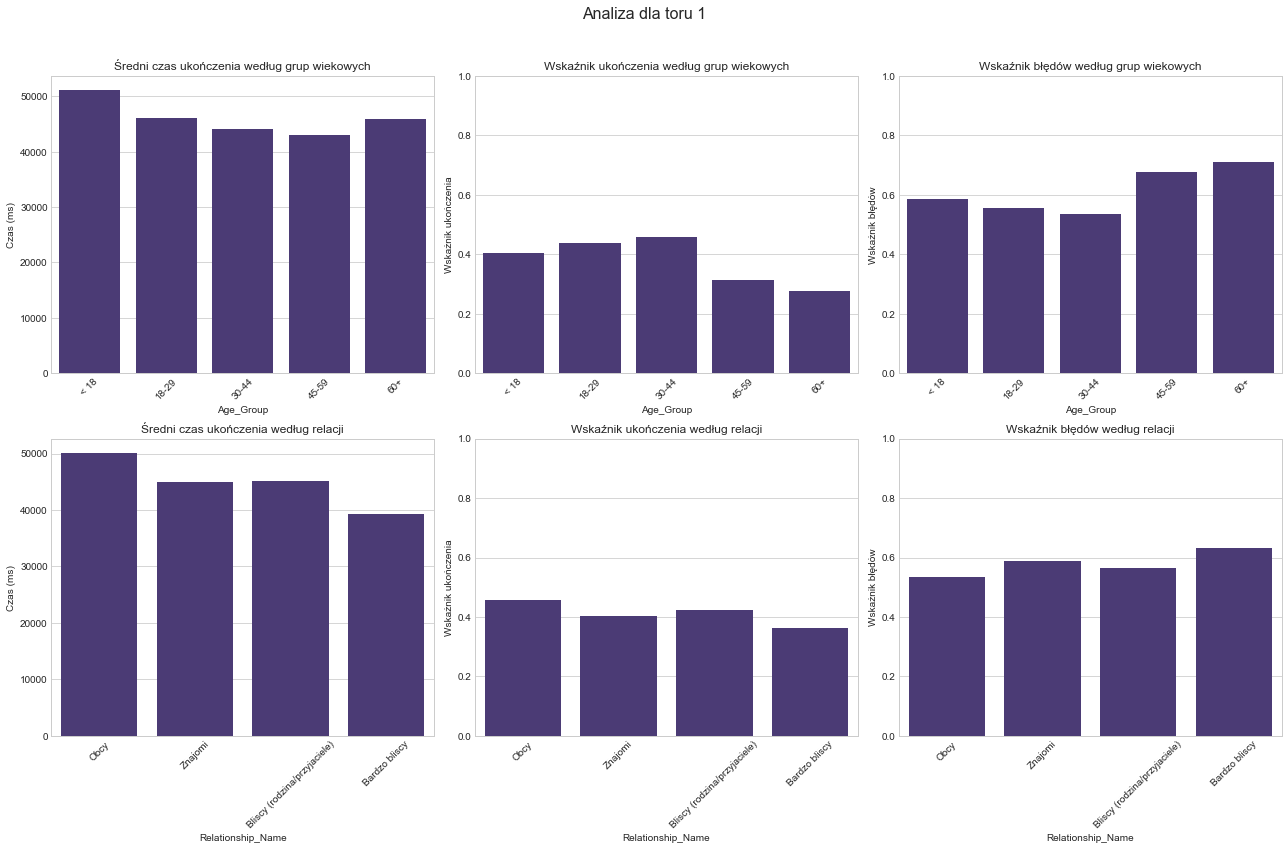

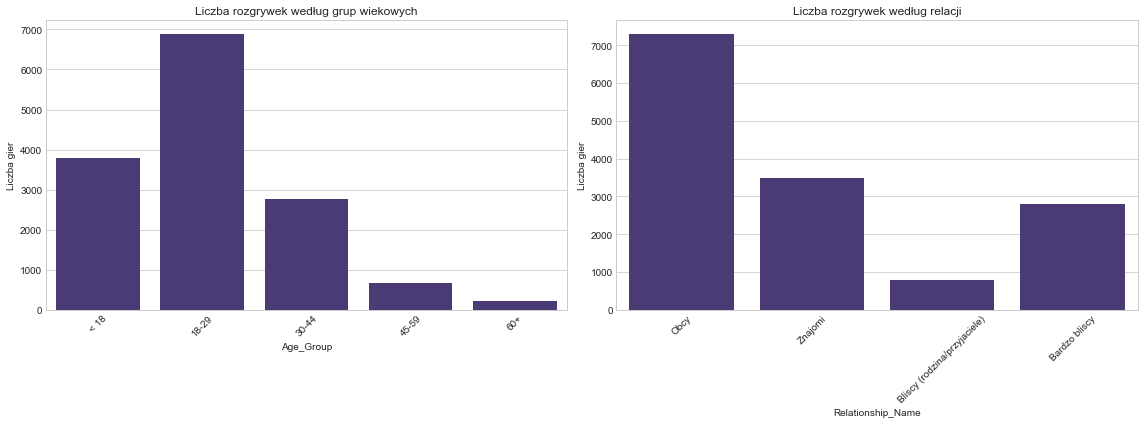

Ukończono analizę dla toru 1

Analiza dla toru 2:
Liczba gier: 16841
Unikalne wartości w Track_Completed: [ True False]
Liczba ukończonych gier: 6271

Analiza wieku - pierwsze wiersze:
  Age_Group  Track_Completed   Mistake    Track_Time  count
4      < 18         0.359058  0.633248  49322.200000   4289
0     18-29         0.390031  0.604486  43918.209904   8025
1     30-44         0.360646  0.633373  44424.435323   3344
2     45-59         0.328452  0.661088  43483.984076    956
3       60+         0.356828  0.638767  41662.061728    227

Analiza relacji - pierwsze wiersze:
              Relationship_Name  Track_Completed   Mistake    Track_Time  \
2                          Obcy         0.396180  0.597997  48795.994121   
3                       Znajomi         0.356302  0.636341  43155.592567   
1  Bliscy (rodzina/przyjaciele)         0.279026  0.714107  39237.604027   
0                 Bardzo bliscy         0.376457  0.616939  38984.927761   

   count  
2   8587  
3   4078  
1   

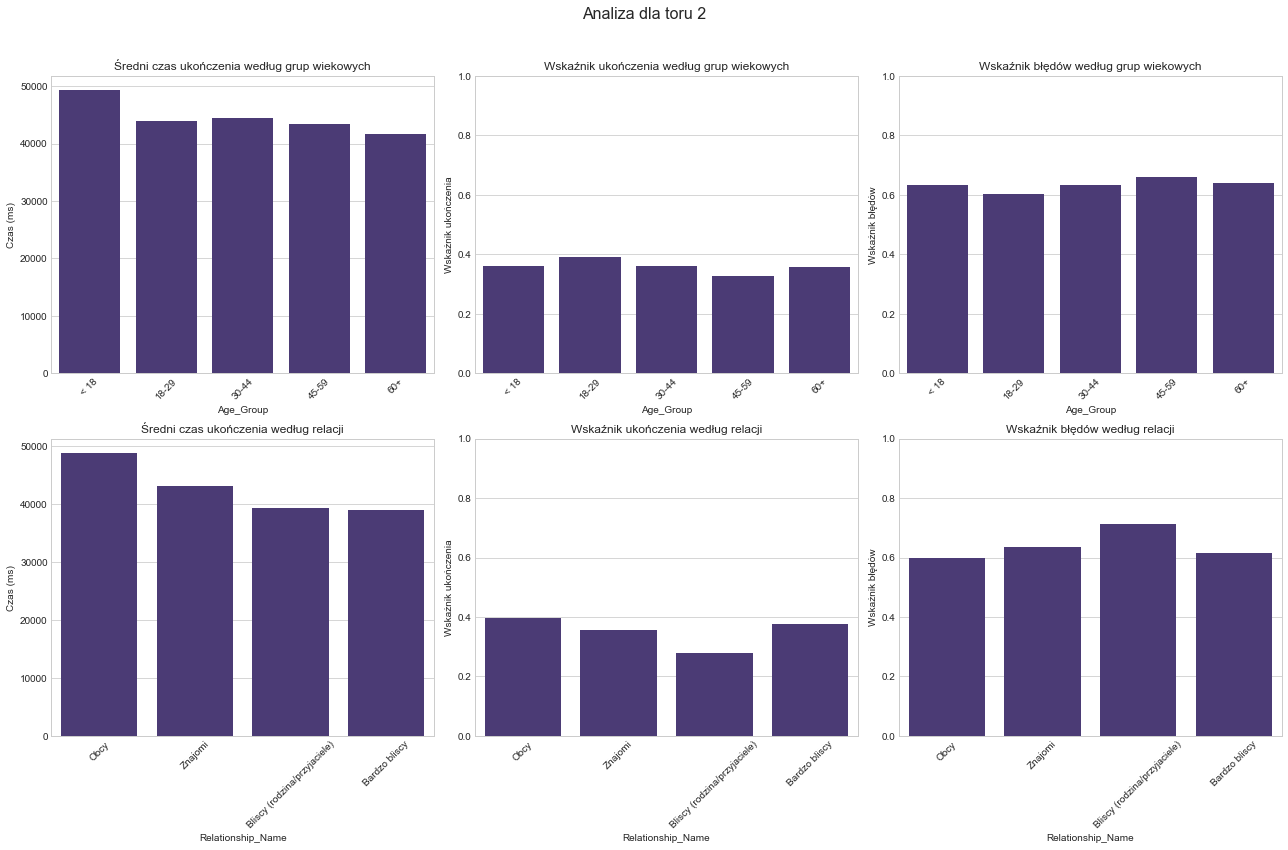

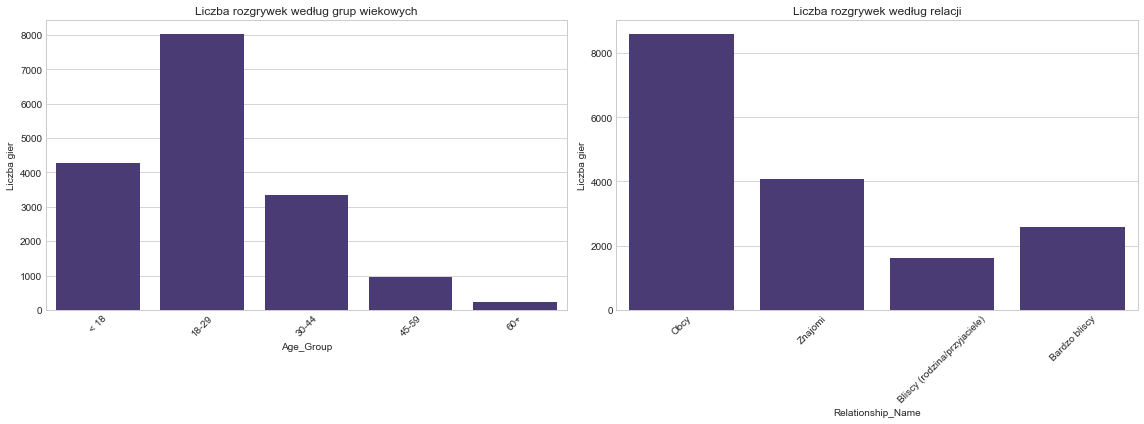

Ukończono analizę dla toru 2

Analiza dla toru 3:
Liczba gier: 14581
Unikalne wartości w Track_Completed: [ True False]
Liczba ukończonych gier: 6589

Analiza wieku - pierwsze wiersze:
  Age_Group  Track_Completed   Mistake    Track_Time  count
4      < 18         0.443288  0.547905  30886.212523   3747
0     18-29         0.465757  0.529838  27801.793472   7038
1     30-44         0.476119  0.518240  28982.267773   2659
2     45-59         0.391231  0.596965  29732.633621    593
3       60+         0.279412  0.716912  18427.657895    544

Analiza relacji - pierwsze wiersze:
              Relationship_Name  Track_Completed   Mistake    Track_Time  \
2                          Obcy         0.487931  0.505891  31814.263251   
3                       Znajomi         0.410108  0.582431  25524.920775   
1  Bliscy (rodzina/przyjaciele)         0.430291  0.563691  28301.163170   
0                 Bardzo bliscy         0.429324  0.567436  23726.322642   

   count  
2   6960  
3   4155  
1   

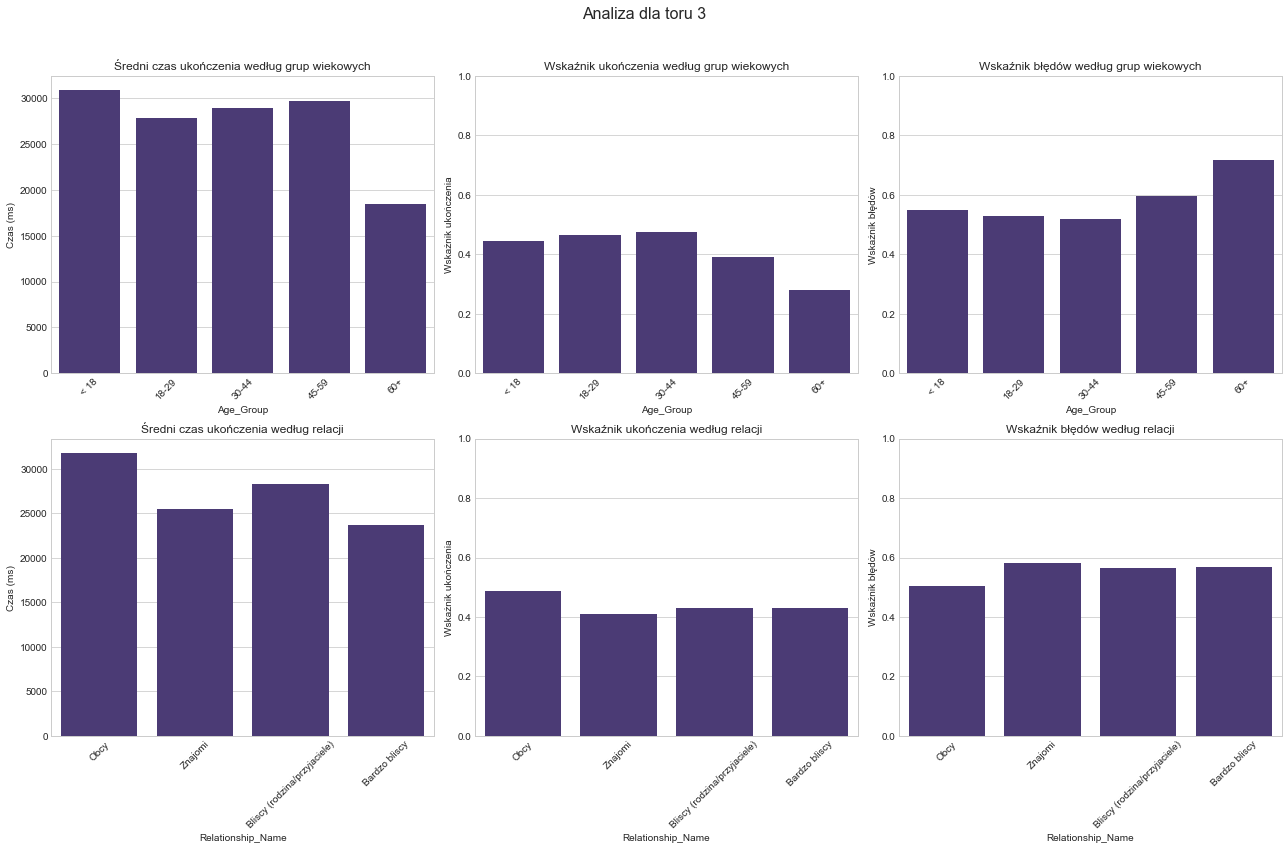

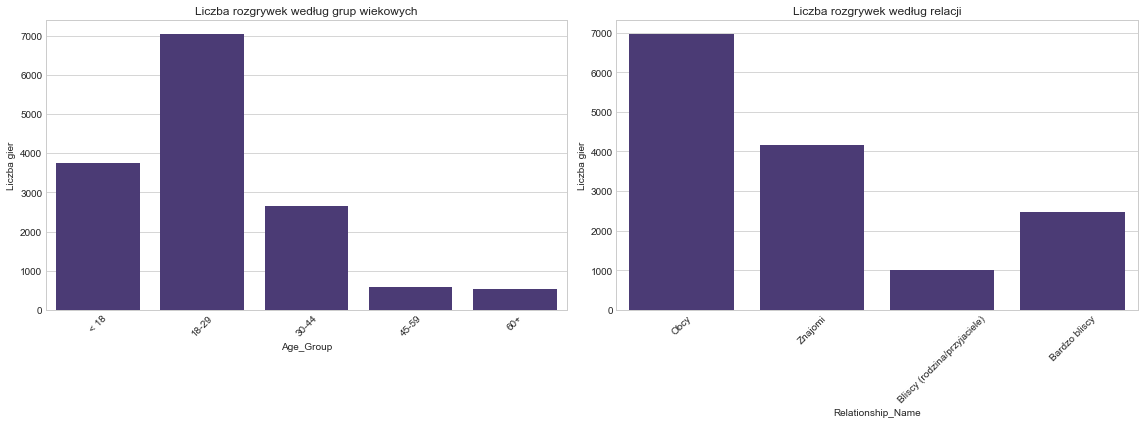

Ukończono analizę dla toru 3

Analiza dla toru 4:
Liczba gier: 10324
Unikalne wartości w Track_Completed: [False  True]
Liczba ukończonych gier: 6553

Analiza wieku - pierwsze wiersze:
  Age_Group  Track_Completed   Mistake    Track_Time  count
4      < 18         0.596658  0.376757  34156.259707   2633
0     18-29         0.644564  0.340401  32054.922548   5188
1     30-44         0.668339  0.314601  32561.072823   1993
2     45-59         0.649573  0.336182  36975.491228    351
3       60+         0.490566  0.452830  26690.679487    159

Analiza relacji - pierwsze wiersze:
              Relationship_Name  Track_Completed   Mistake    Track_Time  \
2                          Obcy         0.665643  0.312284  36122.534025   
3                       Znajomi         0.589031  0.394747  30966.844590   
1  Bliscy (rodzina/przyjaciele)         0.612853  0.366771  29600.434783   
0                 Bardzo bliscy         0.619502  0.366720  26230.644140   

   count  
2   5210  
3   2589  
1   

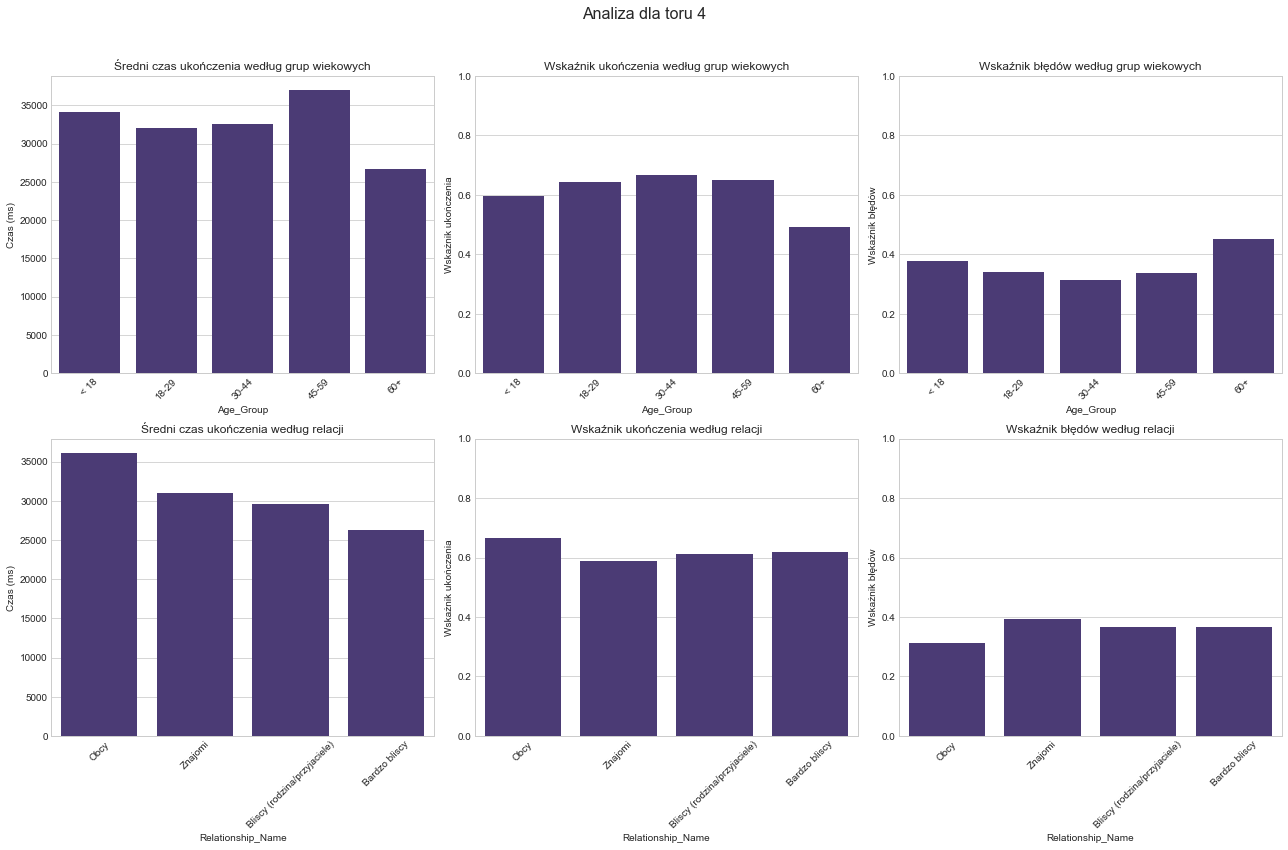

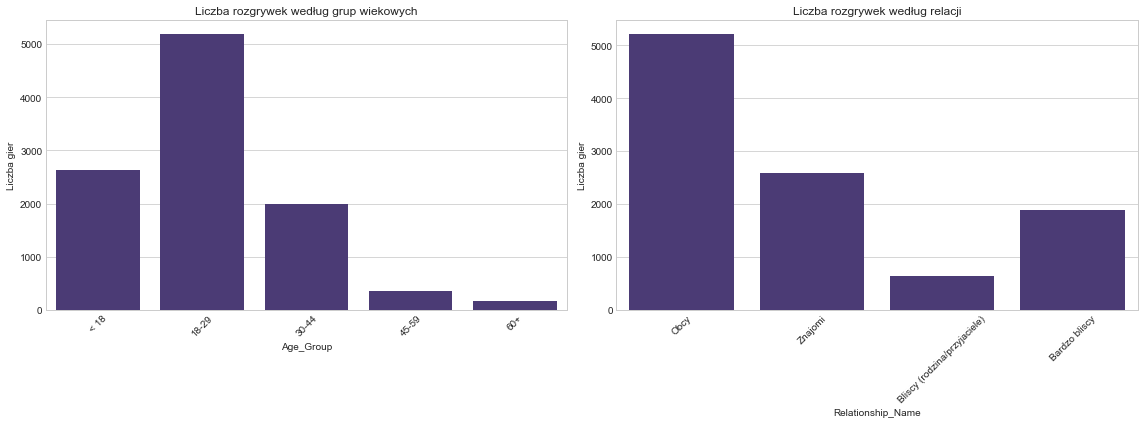

Ukończono analizę dla toru 4

Analiza dla toru 5:
Liczba gier: 9985
Unikalne wartości w Track_Completed: [False  True]
Liczba ukończonych gier: 5965

Analiza wieku - pierwsze wiersze:
  Age_Group  Track_Completed   Mistake    Track_Time  count
4      < 18         0.576220  0.403201  45442.201058   2624
0     18-29         0.610651  0.371400  42278.529393   5070
1     30-44         0.604305  0.369205  44627.349772   1812
2     45-59         0.585987  0.372611  45082.706522    314
3       60+         0.472727  0.503030  35317.820513    165

Analiza relacji - pierwsze wiersze:
              Relationship_Name  Track_Completed   Mistake    Track_Time  \
2                          Obcy         0.622976  0.355306  46159.263914   
3                       Znajomi         0.555780  0.423605  41629.440727   
1  Bliscy (rodzina/przyjaciele)         0.534712  0.431315  39580.323204   
0                 Bardzo bliscy         0.604416  0.381703  38633.131524   

   count  
2   5249  
3   2474  
1    

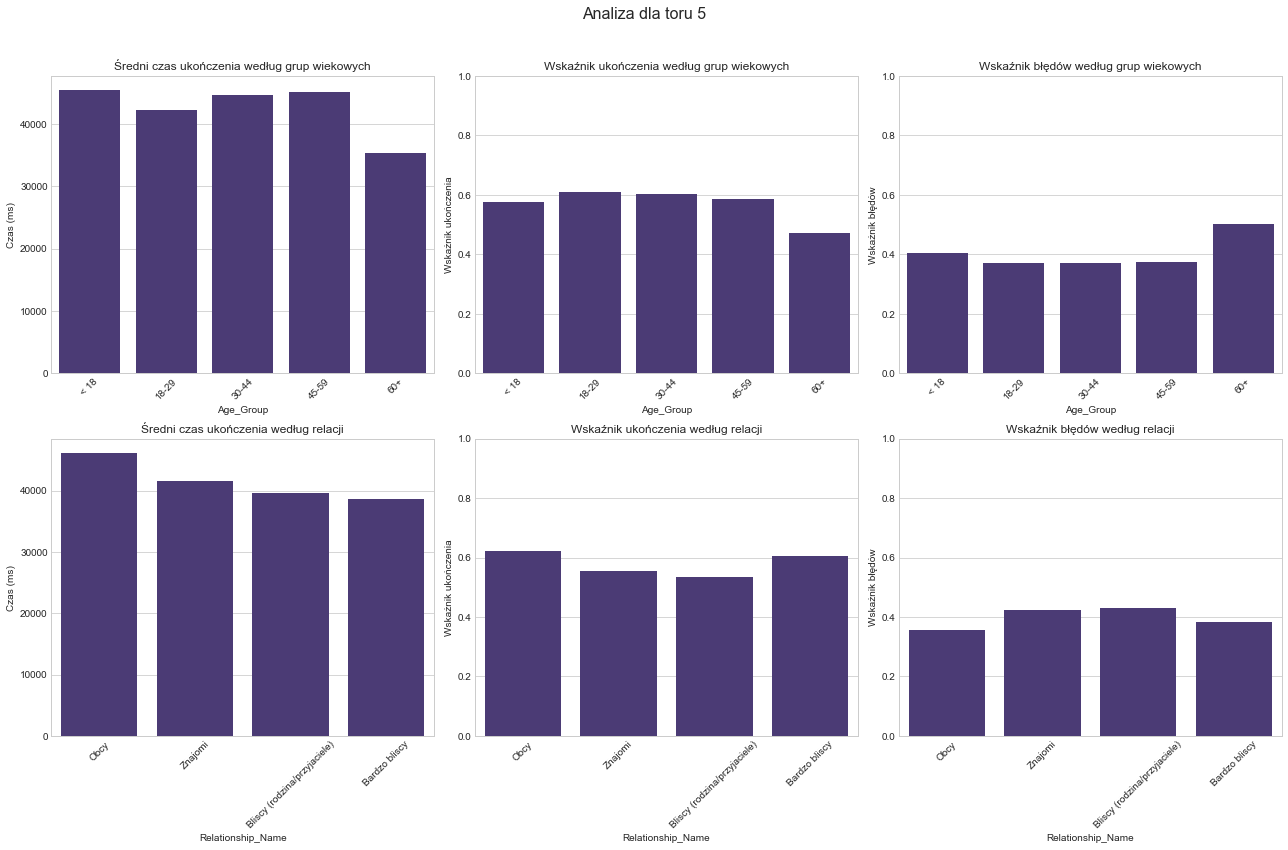

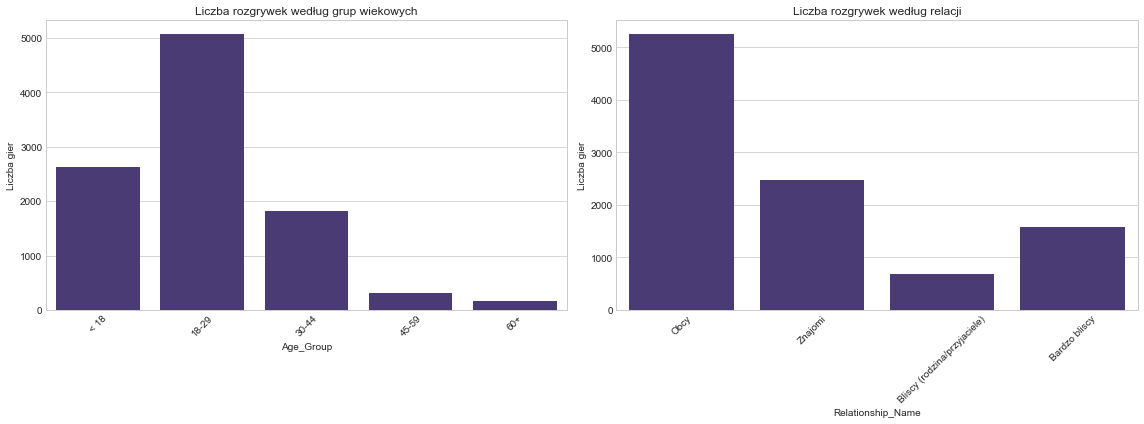

Ukończono analizę dla toru 5

Analiza dla toru 6:
Liczba gier: 11188
Unikalne wartości w Track_Completed: [False  True]
Liczba ukończonych gier: 7486

Analiza wieku - pierwsze wiersze:
  Age_Group  Track_Completed   Mistake    Track_Time  count
4      < 18         0.639408  0.345138  15286.302115   3106
0     18-29         0.680930  0.299538  16255.169752   5632
1     30-44         0.686779  0.296957  17367.585180   1906
2     45-59         0.636364  0.347107  18277.831169    363
3       60+         0.690608  0.292818   9983.192000    181

Analiza relacji - pierwsze wiersze:
              Relationship_Name  Track_Completed   Mistake    Track_Time  \
2                          Obcy         0.670003  0.310321  18126.582947   
3                       Znajomi         0.652773  0.330692  14673.121900   
1  Bliscy (rodzina/przyjaciele)         0.634211  0.351316  12580.410788   
0                 Bardzo bliscy         0.708839  0.276719  13581.662592   

   count  
2   5794  
3   2903  
1   

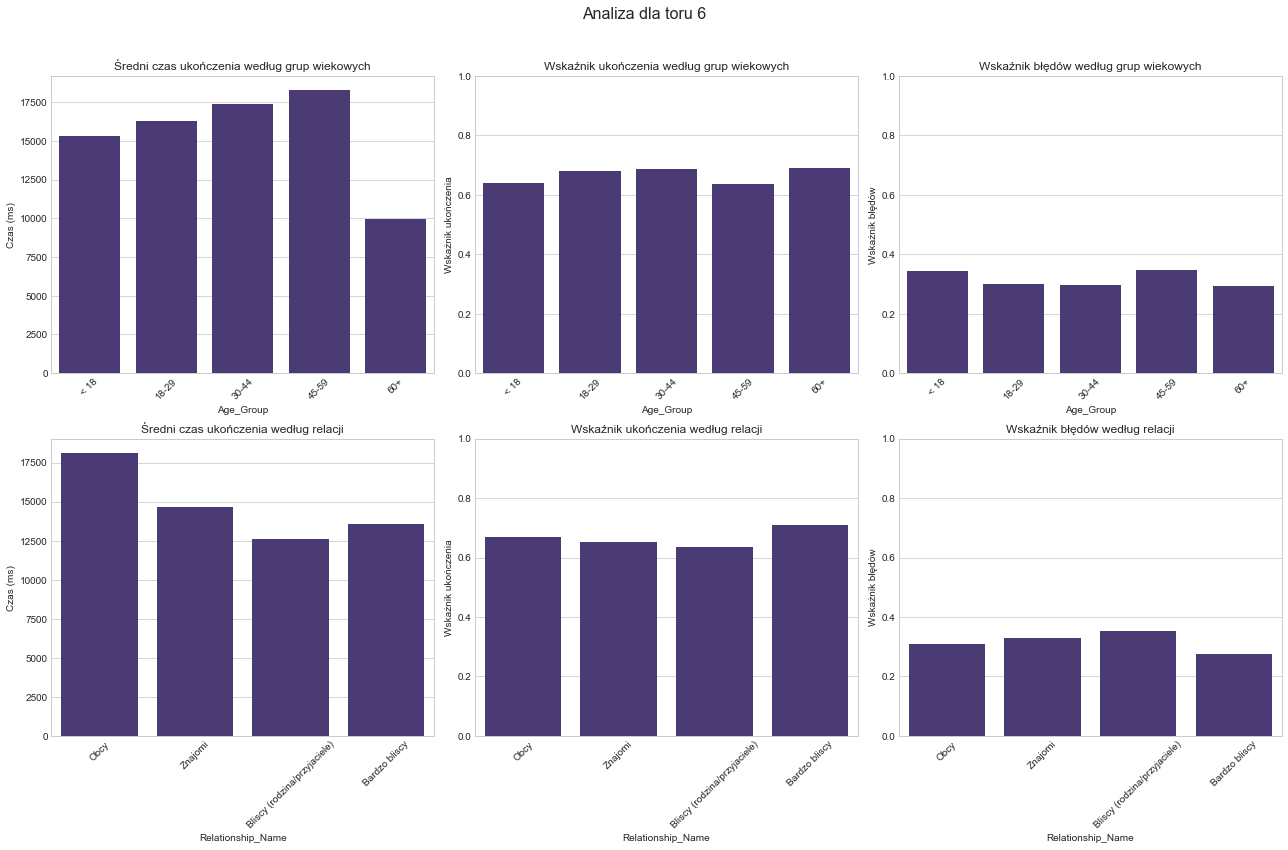

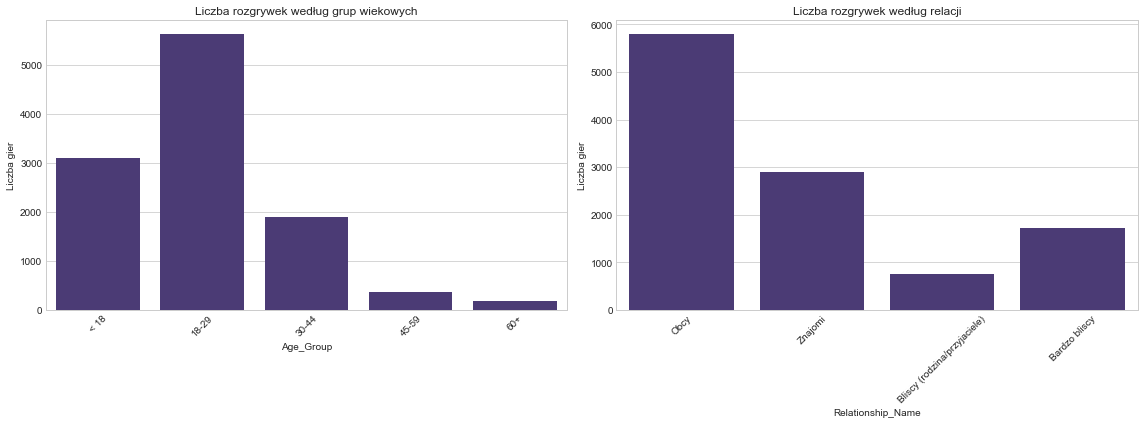

Ukończono analizę dla toru 6

Analiza dla toru 7:
Liczba gier: 14574
Unikalne wartości w Track_Completed: [False  True]
Liczba ukończonych gier: 4032

Analiza wieku - pierwsze wiersze:
  Age_Group  Track_Completed   Mistake    Track_Time  count
4      < 18         0.232468  0.738701  56727.025698   3850
0     18-29         0.299214  0.681473  53110.865376   7249
1     30-44         0.281328  0.694752  51452.645939   2801
2     45-59         0.248322  0.713647  54094.594595    447
3       60+         0.303965  0.682819  43979.855072    227

Analiza relacji - pierwsze wiersze:
              Relationship_Name  Track_Completed   Mistake    Track_Time  \
2                          Obcy         0.286952  0.690418  57017.887787   
3                       Znajomi         0.246436  0.727522  49712.531702   
1  Bliscy (rodzina/przyjaciele)         0.249438  0.717978  51405.923423   
0                 Bardzo bliscy         0.300478  0.682588  47580.312139   

   count  
2   7733  
3   3648  
1   

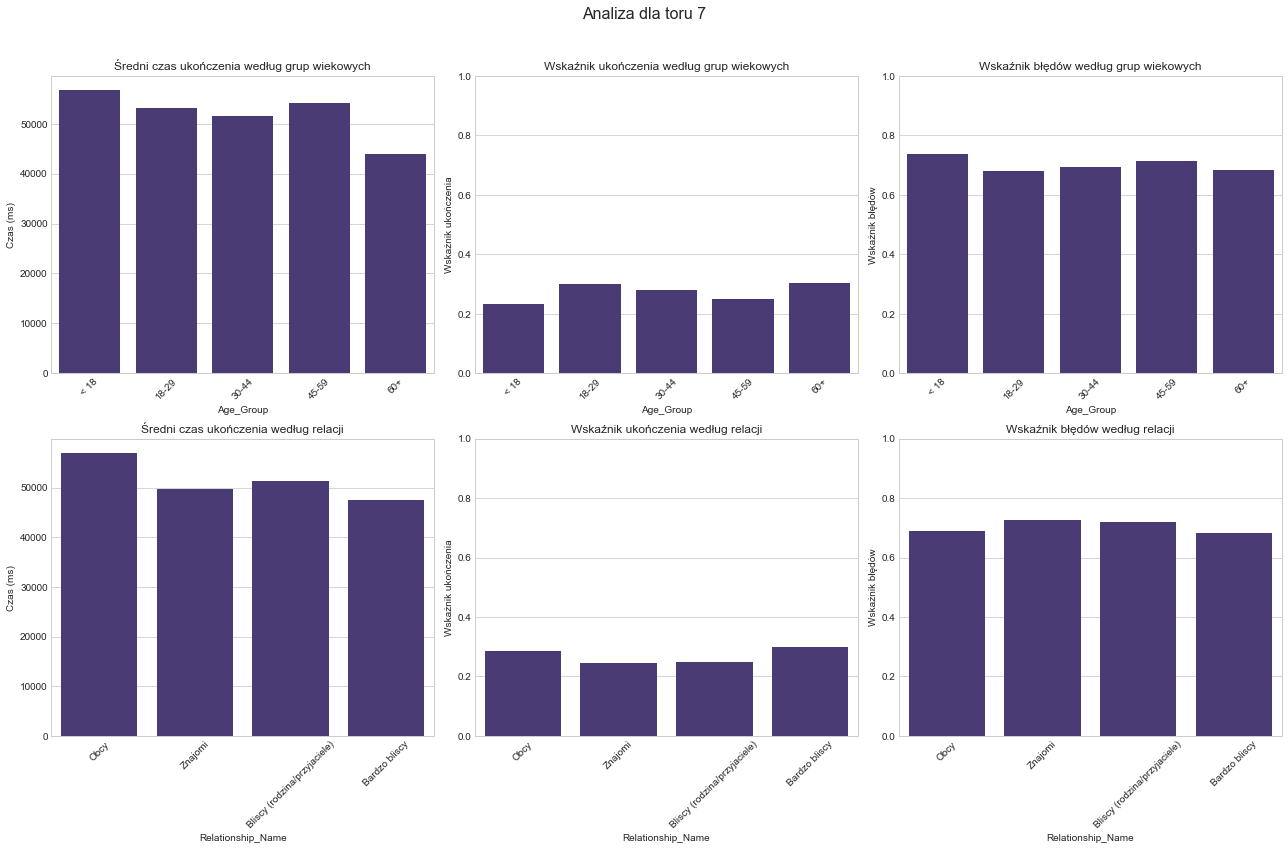

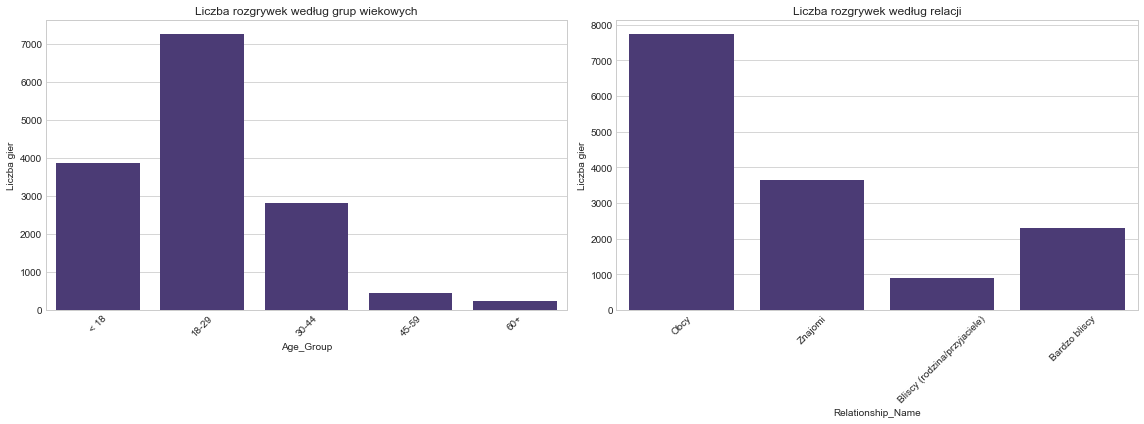

Ukończono analizę dla toru 7

Przygotowywanie porównania torów...
Porównywanie torów: [1, 2, 3, 4, 5, 6, 7]
Przetwarzanie danych dla toru 1...
Liczba ukończonych gier dla toru 1: 6089
Przetwarzanie danych dla toru 2...
Liczba ukończonych gier dla toru 2: 6271
Przetwarzanie danych dla toru 3...
Liczba ukończonych gier dla toru 3: 6589
Przetwarzanie danych dla toru 4...
Liczba ukończonych gier dla toru 4: 6553
Przetwarzanie danych dla toru 5...
Liczba ukończonych gier dla toru 5: 5965
Przetwarzanie danych dla toru 6...
Liczba ukończonych gier dla toru 6: 7486
Przetwarzanie danych dla toru 7...
Liczba ukończonych gier dla toru 7: 4032

Wartości NaN w danych do porównania:
Age data:
Age_Group          0
Track_Completed    0
Mistake            0
Track_Time         0
Track_ID           0
dtype: int64
Relationship data:
Relationship_Name    0
Track_Completed      0
Mistake              0
Track_Time           0
Track_ID             0
dtype: int64


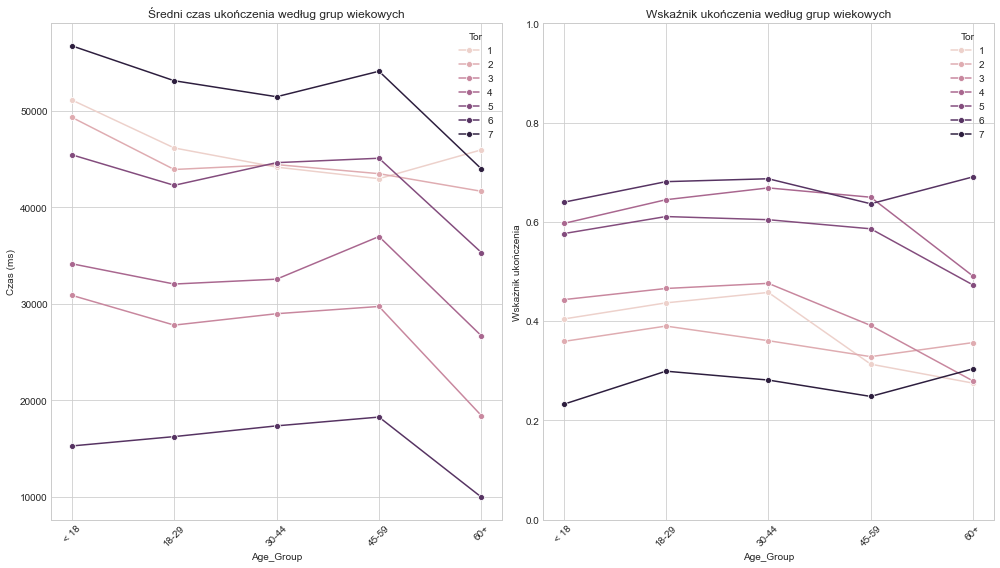

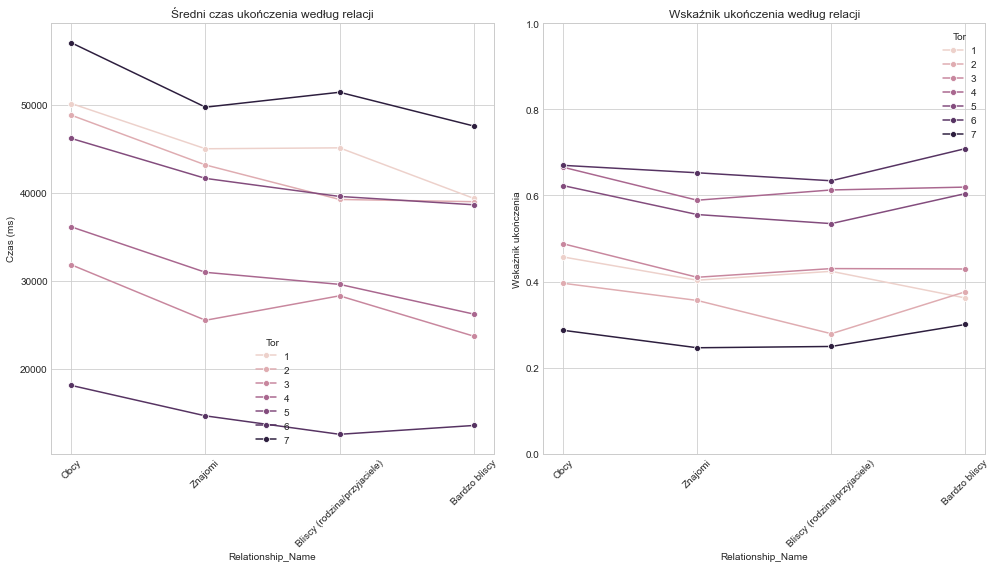

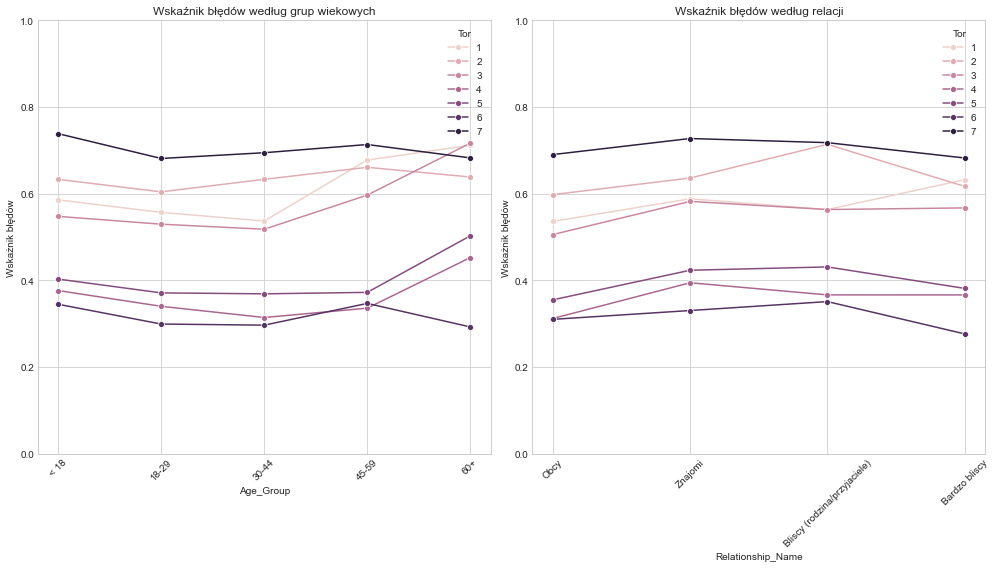


Generowanie raportu podsumowującego...

Analiza zakończona. Wyniki zapisano w katalogu 'wyniki_analizy'.


In [8]:
games_file = './output/games/games.csv'
games_details_dir = './output/games_details'

# Wczytanie danych
print("Wczytywanie danych z pliku games.csv...")
games_df = load_games_data(games_file)
print(f"Wczytano {len(games_df)} rekordów.")

# Unikalne tory
tracks = games_df['Track_ID'].unique()
print(f"Znaleziono {len(tracks)} unikalnych torów: {sorted(tracks)}")

# Przeprowadzenie analizy dla wszystkich torów
results = {}

# Możemy ograniczyć liczbę analizowanych torów, jeśli jest ich dużo
tracks_to_analyze = sorted(tracks)[:10]  # Pierwsze 10 torów

print(f"Analizowanie {len(tracks_to_analyze)} torów...")
for track_id in tracks_to_analyze:
    result = analyze_track(games_df, track_id)
    if result:
        results[track_id] = result
        visualize_track_analysis(result)
        print(f"Ukończono analizę dla toru {track_id}")

# Porównanie wyników między torami
print("\nPrzygotowywanie porównania torów...")
compare_all_tracks(games_df, tracks_to_analyze)

# Generowanie raportu podsumowującego
print("\nGenerowanie raportu podsumowującego...")
generate_summary_report(games_df, results)

print("\nAnaliza zakończona. Wyniki zapisano w katalogu 'wyniki_analizy'.")
